<div align = 'center'>
<h1> TRADING ALGORITHM </h1>
</div>

<h3>Algorithm Rules</h3>

 Buy S&P 500 when it crosses above its 50 dma\
 Sell S&P 500 when it falls below its 50 dma

 Buy NASDAQ when it crosses above its 50 dma\
 Sell NASDAQ when it falls below its 50 dma

 Buy TLT when it crosses above its 50 dma\
 Sell TLT when it falls below its 50 dma

In [6]:
#import libraries
#pip install *insert library name*

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Get data into a dataframe
df = pd.read_csv('/Users/vaishalirathi/Desktop/YT_videos/trading_algorithm.csv')

df

#Algorithm rules (T/F values)
df['Long S&P'] = df['S&P 500'] > df['S&P 500'].rolling(window=50).mean()
df['Long NASDAQ'] = df['NASDAQ 100'] > df['NASDAQ 100'].rolling(window=50).mean()
df['Long TLT'] = df['TLT'] > df['TLT'].rolling(window=50).mean()

df

,Date,S&P 500,NASDAQ 100,TLT,Long S&P,Long NASDAQ,Long TLT
0,7/30/02,902.780029,980.359985,42.946541,False,False,False
1,7/31/02,911.619995,962.099976,43.478630,False,False,False
2,8/1/02,884.659973,913.590027,43.726223,False,False,False
3,8/2/02,864.239990,892.510010,44.174053,False,False,False
4,8/5/02,834.599976,857.080017,44.368938,False,False,False
...,...,...,...,...,...,...,...
4608,11/16/20,3626.909912,12013.379880,157.779999,True,True,False
4609,11/17/20,3609.530029,11977.490230,158.809998,True,True,False
4610,11/18/20,3567.790039,11894.709960,159.270004,True,True,False
4611,11/19/20,3581.870117,11985.429690,160.089996,True,True,False


In [8]:
#initialize variables
spx_position = 0
ndx_position = 0
tlt_position = 0

total_position = [spx_position, ndx_position, tlt_position]
    

        
#calculate cash
cash = 100

#calculate $ value of portfolio
portfolio = sum(total_position) + cash


In [9]:
#create columns
df['spx_position'] = np.nan
df['ndx_position'] = np.nan
df['tlt_position'] = np.nan

df['cash'] = np.nan
df['portfolio'] = np.nan

df

,Date,S&P 500,NASDAQ 100,TLT,Long S&P,Long NASDAQ,Long TLT,spx_position,ndx_position,tlt_position,cash,portfolio
0,7/30/02,902.780029,980.359985,42.946541,False,False,False,NaN,NaN,NaN,NaN,NaN
1,7/31/02,911.619995,962.099976,43.478630,False,False,False,NaN,NaN,NaN,NaN,NaN
2,8/1/02,884.659973,913.590027,43.726223,False,False,False,NaN,NaN,NaN,NaN,NaN
3,8/2/02,864.239990,892.510010,44.174053,False,False,False,NaN,NaN,NaN,NaN,NaN
4,8/5/02,834.599976,857.080017,44.368938,False,False,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4608,11/16/20,3626.909912,12013.379880,157.779999,True,True,False,NaN,NaN,NaN,NaN,NaN
4609,11/17/20,3609.530029,11977.490230,158.809998,True,True,False,NaN,NaN,NaN,NaN,NaN
4610,11/18/20,3567.790039,11894.709960,159.270004,True,True,False,NaN,NaN,NaN,NaN,NaN
4611,11/19/20,3581.870117,11985.429690,160.089996,True,True,False,NaN,NaN,NaN,NaN,NaN


In [10]:
#Algorithm Calculations
#determing portfolio start

df['tlt_position'][49] = tlt_position
df['ndx_position'][49] = ndx_position
df['spx_position'][49] = spx_position

df['cash'][49] = cash
df['portfolio'][49] = portfolio

#calculate n

n = 0
for y in total_position:
    if y == 0:
        n = n+1
        
#determining portfolio

for x in range(50, len(df)):
    
    
    
    ##determining S&P portfolio##
    
    #for a new position
    if ((df['Long S&P'][x] == True) & (df['Long S&P'][x-1] == False)):
        spx_position = cash*(1/n)
        cash = cash - spx_position
        
    #this is for an existing position
    if ((df['Long S&P'][x] == True) & (df['Long S&P'][x-1] == True)):
        spx_position = df['spx_position'][x-1]*(df['S&P 500'][x]/df['S&P 500'][x-1])
        
    #this is for closing a position (return market_position to cash)
    if ((df['Long S&P'][x] == False) & (df['Long S&P'][x-1] == True)):
        cash = cash + df['spx_position'][x-1]*(df['S&P 500'][x]/df['S&P 500'][x-1])
        spx_position = 0
        
    #this is for no position
    if ((df['Long S&P'][x] == False) & (df['Long S&P'][x-1] == False)):
        spx_position = 0

    #re-calculate 'n'
    #number_of_positions()
    total_position = [spx_position, ndx_position, tlt_position]
    n = 0
    for y in total_position:
        if y == 0:
            n = n+1
    
    
    
    ##determining NASDAQ portfolio##
    
    #for a new position
    if ((df['Long NASDAQ'][x] == True) & (df['Long NASDAQ'][x-1] == False)):
        ndx_position = cash*(1/n)
        cash = cash - ndx_position
        
    #this is for an existing position
    if ((df['Long NASDAQ'][x] == True) & (df['Long NASDAQ'][x-1] == True)):
        ndx_position = df['ndx_position'][x-1]*(df['NASDAQ 100'][x]/df['NASDAQ 100'][x-1])

    #this is for closing a position (return market_position to cash)
    if ((df['Long NASDAQ'][x] == False) & (df['Long NASDAQ'][x-1] == True)):

        cash = cash + df['ndx_position'][x-1]*(df['NASDAQ 100'][x]/df['NASDAQ 100'][x-1])
        ndx_position = 0
        
    #this is for no position
    if ((df['Long NASDAQ'][x] == False) & (df['Long NASDAQ'][x-1] == False)):
        ndx_position = 0
    
    #re-calculate 'n'
    #number_of_positions()
    total_position = [spx_position, ndx_position, tlt_position]
    n = 0
    for y in total_position:
        if y == 0:
            n = n+1
    
    
    ##determining TLT portfolio##
    
    #for a new position
    if ((df['Long TLT'][x] == True) & (df['Long TLT'][x-1] == False)):
        tlt_position = cash*(1/n)
        cash = cash - tlt_position
        
    #this is for an existing position
    if ((df['Long TLT'][x] == True) & (df['Long TLT'][x-1] == True)):
        tlt_position = df['tlt_position'][x-1]*(df['TLT'][x]/df['TLT'][x-1])

    #this is for closing a position (return market_position to cash)
    if ((df['Long TLT'][x] == False) & (df['Long TLT'][x-1] == True)):
        cash = cash + df['tlt_position'][x-1]*(df['TLT'][x]/df['TLT'][x-1])
        tlt_position = 0
        
    #this is for no position
    if ((df['Long TLT'][x] == False) & (df['Long TLT'][x-1] == False)):
        tlt_position = 0
    
    #re-calculate 'n'
    #number_of_positions()
    total_position = [spx_position, ndx_position, tlt_position]
    n = 0
    for y in total_position:
        if y == 0:
            n = n+1
            

    
    portfolio = spx_position + ndx_position + tlt_position + cash
      
        
    df['spx_position'][x] = spx_position
    df['ndx_position'][x] = ndx_position
    df['tlt_position'][x] = tlt_position

    df['cash'][x] = cash
    df['portfolio'][x] = portfolio
        
        
    
df


<ipython-input-10-24f5d020815e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tlt_position'][49] = tlt_position
<ipython-input-10-24f5d020815e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ndx_position'][49] = ndx_position
<ipython-input-10-24f5d020815e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spx_position'][49] = spx_position
<ipython-input-10-24f5d020815e>:8: SettingWithCopyWarning: 
A value is trying to b

,Date,S&P 500,NASDAQ 100,TLT,Long S&P,Long NASDAQ,Long TLT,spx_position,ndx_position,tlt_position,cash,portfolio
0,7/30/02,902.780029,980.359985,42.946541,False,False,False,NaN,NaN,NaN,NaN,NaN
1,7/31/02,911.619995,962.099976,43.478630,False,False,False,NaN,NaN,NaN,NaN,NaN
2,8/1/02,884.659973,913.590027,43.726223,False,False,False,NaN,NaN,NaN,NaN,NaN
3,8/2/02,864.239990,892.510010,44.174053,False,False,False,NaN,NaN,NaN,NaN,NaN
4,8/5/02,834.599976,857.080017,44.368938,False,False,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4608,11/16/20,3626.909912,12013.379880,157.779999,True,True,False,79.032561,76.540556,0.000000,75.034639,230.607756
4609,11/17/20,3609.530029,11977.490230,158.809998,True,True,False,78.653843,76.311893,0.000000,75.034639,230.000375
4610,11/18/20,3567.790039,11894.709960,159.270004,True,True,False,77.744303,75.784477,0.000000,75.034639,228.563419
4611,11/19/20,3581.870117,11985.429690,160.089996,True,True,False,78.051116,76.362478,0.000000,75.034639,229.448233


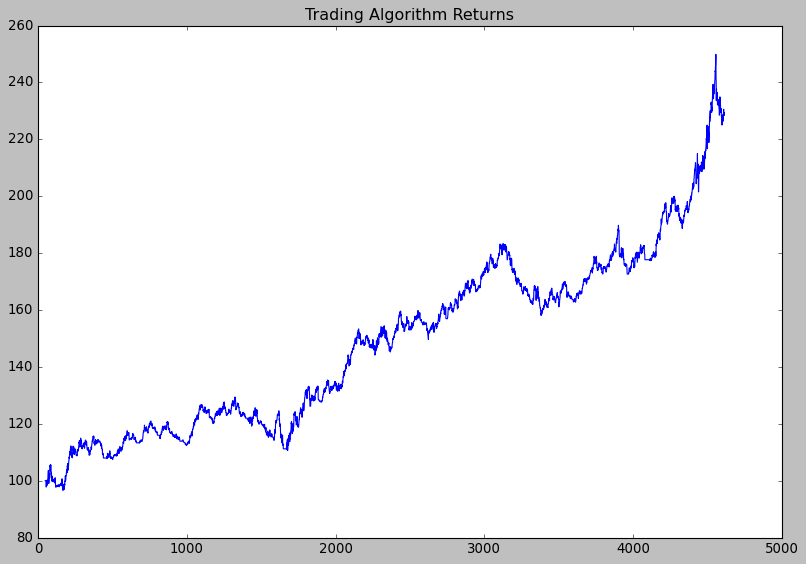

In [11]:
#Plot out trading strategy's returns
plt.style.use('classic')
fig, axs = plt.subplots(figsize=(12,8))
axs.set_title('Trading Algorithm Returns')
axs.plot(df['portfolio'])